In [2]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from IPython.display import display

Многослойные персептроны(MLP) также называют простыми(vanilla) нейронными сетями прямого распространения, а иногда и просто нейронными сетями.

LPможно рассматривать как обобщение линейных моделей, которое прежде чем прийти к решению выполняет несколько этапов обработки данных

𝑦ˆ-это  взвешенная  сумма  входных  признаков 𝑥[0]...𝑥[𝑝]. Входные признаки взвешены по вычисленным в ходе обучения коэффициентам 𝑤[0]...𝑤[𝑝]. Мы может представить их графически, как показано на рис. 11.1

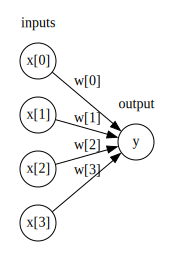

In [6]:
display(mglearn.plots.plot_logistic_regression_graph())

Здесь  каждый  узел,  показанный  слева,  представляет  собой  входной  признак, соединительные линии –коэффициенты, а узел справа –это выход, который является взвешенной суммой входов.

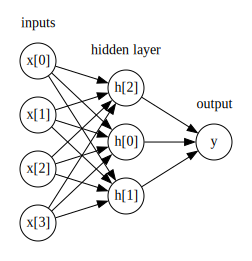

In [4]:

display(mglearn.plots.plot_single_hidden_layer_graph())


MLPпроцесс  вычисления  взвешенных  сумм  повторяется  несколько  раз.  Сначала вычисляются скрытые элементы (hidden units), которые представляют собой промежуточный этап обработки.  Они  вновь  объединяются  с  помощью  взвешенных  сумм  для  получения  конечного результата (рис. 11.2)

Этой модели гораздо больше вычисляемых коэффициентов (также называемых весами): коэффициент между каждым входом и каждым скрытым элементом (которые образуют скрытый слой или hidden layer)коэффициент между каждым элементом скрытого слоя и выходом


Затем происходит вычисление взвешенной суммы входов для каждого элемента скрытого слоя, к ней применяется функция активации–обычно используются нелинейные функции
 выпрямленный линейный элемент (rectified linear unitили relu) или 
 гиперболический тангенс (hyperbolic tangentили tanh)

 В  итоге  получаем  выходы  нейронов  скрытого  слоя.  Эти  промежуточные  выходы  могут считаться  нелинейными  преобразованиями  и  комбинациями  первоначальных  входов.


 

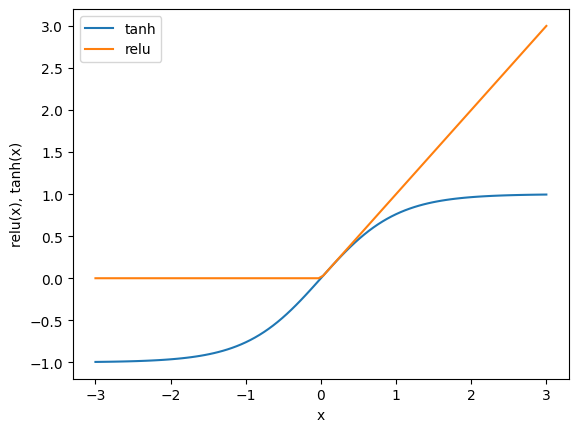

In [7]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()


Relu отсекает значения ниже нуля, в то время как tanhпринимает значения от –1 до 1 (соответственно для минимального и максимального значений входов). Любая из  этих  двух  нелинейных  функций  позволяет  нейронной  сети  вотличие  от  линейной  модели вычислять гораздо более сложные зависимости.

Важный  параметр, который должен задать пользователь –количество узлов в скрытом слое. Его значение может быть маленьким, например, 10 для очень маленьких или простых наборов данных или же большим,например,  10000  для  очень  сложных  данных.  Кроме  того,  можно  добавить  дополнительные скрытые слои,

In [3]:
mglearn.plots.plot_two_hidden_layer_graph()
plt.show()


Построение  больших  нейронных  сетей,  состоящих  из  множества  слоев  вычислений, вдохновило специалистов ввести в обиход термин «глубокое обучение» («deep learning»).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons


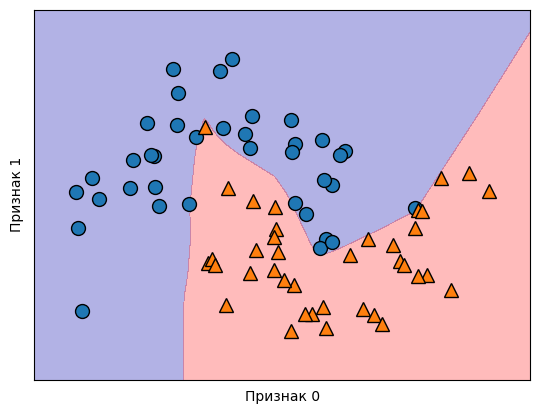

In [5]:

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()


two_moonsКак  видно  из  рис.,  нейронная  сеть  построила  нелинейную,  но  относительно  гладкую границу принятия решений. Мы использовали solver='lbfgs', который рассмотрим позднее.

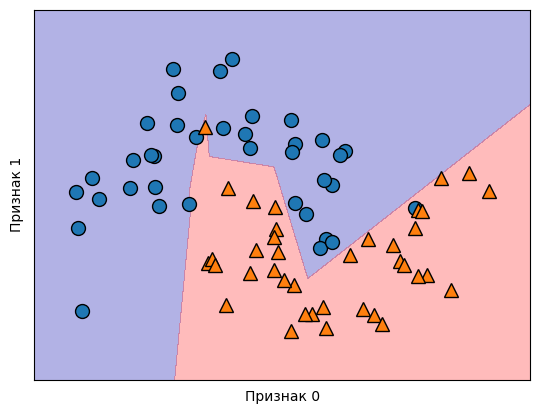

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()


По  умолчанию MLPиспользует  100  скрытых  узлов,  что  довольно  много  для  этого небольшого набора данных. Мы можем уменьшить число (что снизит сложность модели) и снова получить хороший результат (рис. 11.6)



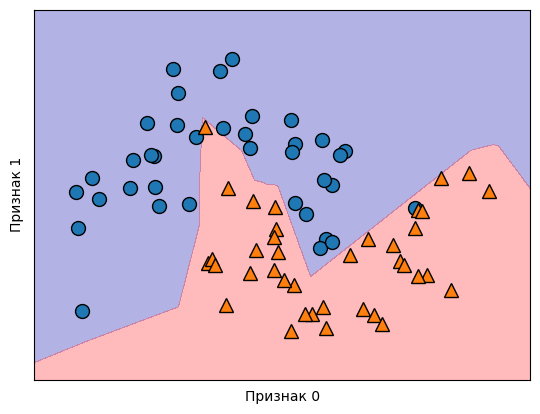

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")

plt.ylabel("Признак 1")
plt.show()


При  использовании  лишь  10  скрытых  элементов  граница  принятия  решений  становится более неровной. По умолчанию используется функция активации relu, показанная на рис. 2.46. При использовании  одного  скрытого  слоя  решающая  функция  будет  состоять  из  10  прямолинейных отрезков

Если необходимо получить более гладкую решающую границу, можно добавить большее количество скрытых элементов (как показано на рис. 11.6), добавить второй скрытый слой (рис. 11.7), или использовать функцию активации tanh (рис. 11.8)

c:\Users\Dima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


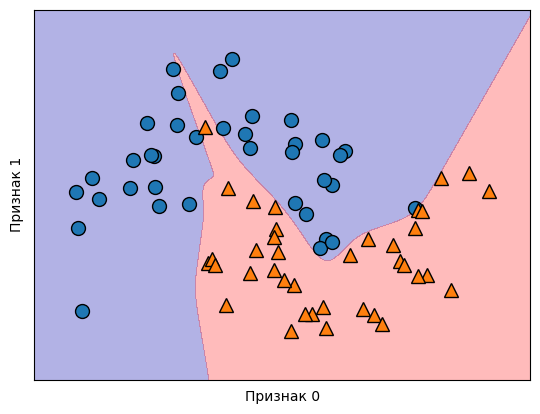

In [8]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()


И, наконец, мы можем дополнительно настроить сложность нейронной сети с помощью l2штрафа, чтобы сжать весовые коэффициенты до близких к нулю значений, как мы это делали в гребневой регрессии и линейных классификаторов. В MLPClassifierза это отвечает параметр alpha(как  и  в  моделях  линейной  регрессии),  и  поумолчанию  установлено  оченьнизкое  значение (небольшая  регуляризация).  На  рис. 11.9показаны  результаты  применения  к  набору  данных two_moonsразличных  значений alphaс  использованием  двух  скрытых  слоев  с  10  или  100 элементами в каждом

c:\Users\Dima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Dima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


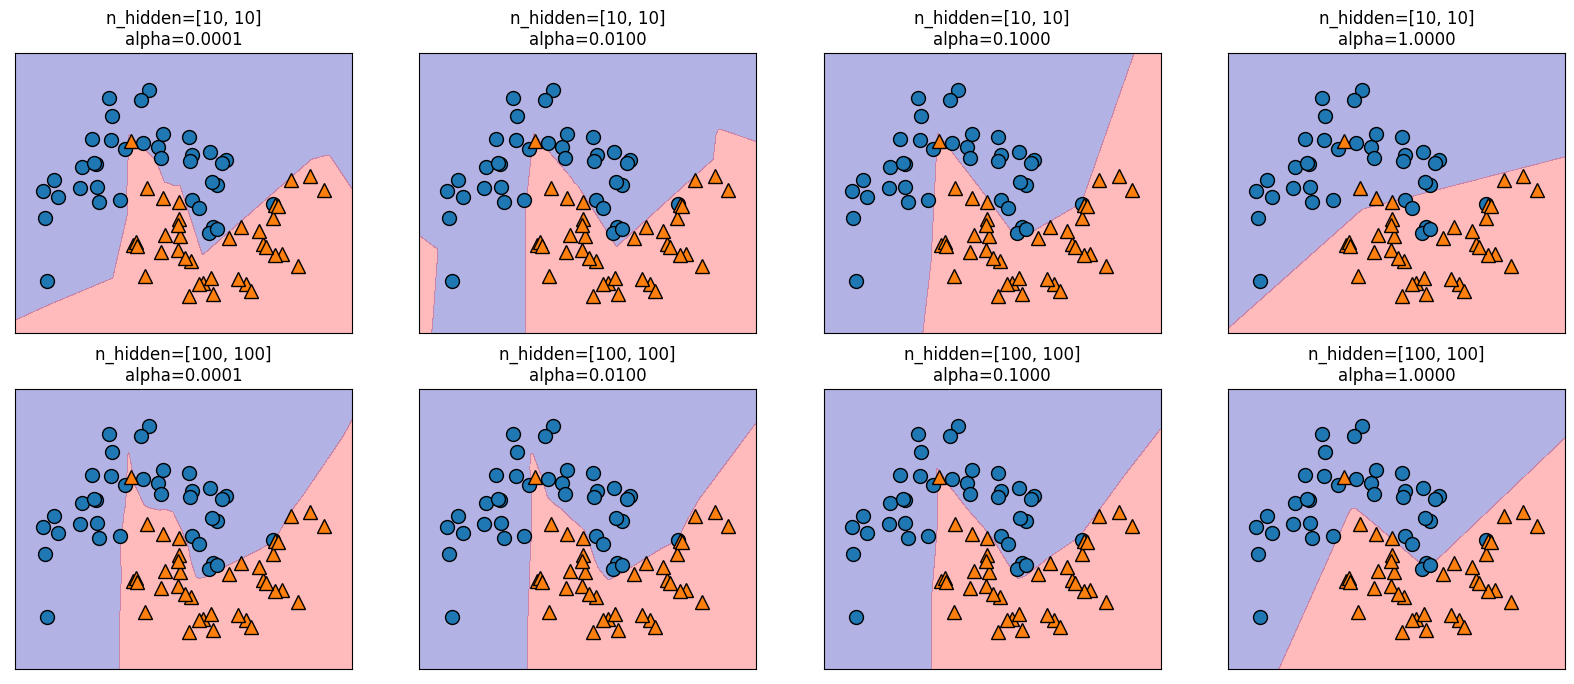

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()


ак  вы,  наверное,  уже  поняли,  существуют  различные  способы  регулировать  сложность нейронной  сети: количество  скрытых  слоев, количество  элементов  в  каждом  скрытом  слоеи регуляризация (alpha). На  самом  деле  их  гораздо  больше,  но  мы  не  будем  здесь  вдаваться  в подробности

KeyboardInterrupt: 

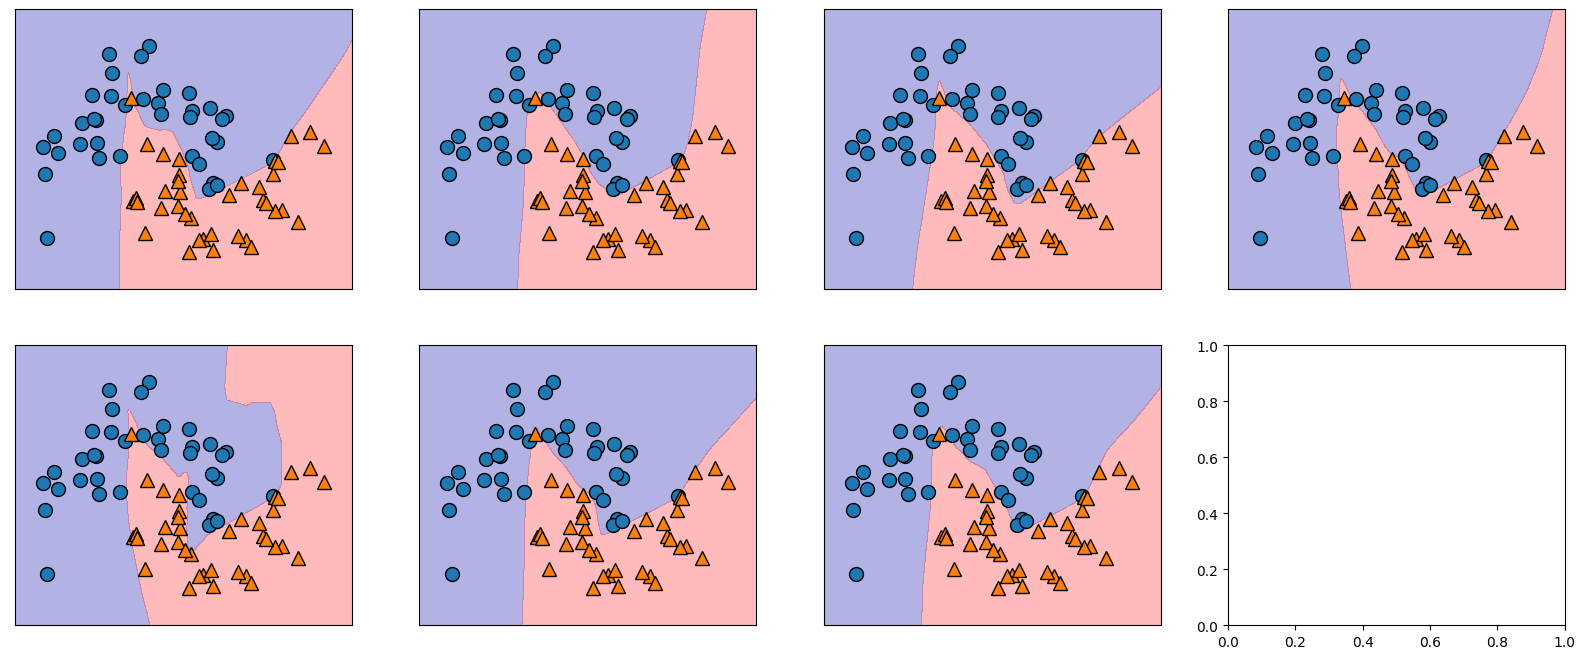

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
plt.show()


Важным свойством нейронных сетей является то, что их веса задаются случайным образом перед  началом  обучения  и  случайная  инициализация  влияет  на  процесс  обучения  модели.  Это означает,  что  даже  при  использовании  одних  и  тех  же  параметров  мы  можем  получить  очень разные  модели,  задавая  разные  стартовые  значения  генератора  псевдослучайных  чисел.  При условии, что сеть имеет большой размер исложность настроена правильно, данный фактне должен сильно влиять на правильность, однако о нем стоит помнить (особенно при работе с небольшими сетями). На рис. 11.10представлены графикинескольких моделей, обученных с использованием тех же самых значений параметров:

In [12]:

from sklearn.datasets import load_breast_cancer


In [13]:

cancer = load_breast_cancer()
print("Максимальныезначенияхарактеристик:\n{}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Правильностьнаобучающемнаборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильностинатестовомнаборе: {:.2f}".format(mlp.score(X_test, y_test)))


Максимальныезначенияхарактеристик:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Правильностьнаобучающемнаборе: 0.94
Правильностинатестовомнаборе: 0.92


MLPдемонстрирует  довольно  неплохую  правильность,  однако  не  столь  хорошую,  если сравнивать с другими моделями. Как и в предыдущем примере с SVC, это, вероятно, обусловлено масштабом  данных.  Нейронные  сети  также  требуют  того,  чтобы  все  входные  признаки  былиизмерены в одном и том же масштабе, в идеале они должны иметь среднее 0 и дисперсию 1. Мы должны отмасштабировать наши данные так, чтобы они отвечали этим требованиям. Опять же, мы 
будем делать это вручную, однако в главе 3 расскажем, как это делать автоматически с помощью StandardScaler.

In [ ]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильностьнаобучающемнаборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильностьнатестовомнаборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильностьнаобучающемнаборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильностьнатестовомнаборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильностьнаобучающемнаборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильностьнатестовомнаборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцыматрицывесов")
plt.ylabel("Входнаяхарактеристика")
plt.colorbar()
plt.show()


Несмотря на то что анализ нейронной сети возможен, он, как правило, гораздо сложнее анализа линейной модели или модели на основе дерева. Один из способов анализа нейронной сети  заключается  в  том,  чтобы  исследовать  веса  модели

Нейронные сети, особенно крупные нейронные сети, как правило, требуют длительного времени обучения. Как мы видели здесь, они также требуют тщательной предварительной обработки данных. Аналогично SVM, нейронные сети лучше всего работают с «однородными» данными, где все признаки измерены в одномтом же масштабе. Что касается данных, в которых признаки имеют разный масштаб, модели на основе дерева могут дать лучший результат

Алгоритм 'adam',  выставленный  по  умолчанию,  дает  хорошее  качество  в  большинстве ситуаций,  но  весьма  чувствителен  к  масштабированию  данных  (поэтому  важно отмасштабировать  ваши  данные  так,  чтобы  каждая  характиристика  имела  среднее  0  и дисперсию 1). Другой алгоритм 'lbfgs'вполне надежен, но может занять много времени в случае  больших  моделей  или  больших  массивов  данных.  Существует  также  более продвинутая  опция 'sgd',  которая  используется  многими  специалистами  по  глубокому обучению. Опция'sgd'имеет большее количество дополнительных параметров, которые нужно настроить для получения наилучших результато